In [3]:
#----------importing required modules---------
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

In [ ]:
#Load the dataset

df = pd.read_csv("./heart.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
X = df.iloc[:,:-1]
y = df['target']


X_train , X_test , y_train , y_test  =train_test_split(X , y , test_size=0.2 , random_state=42)

In [9]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train , y_train)
y_pred = rf_model.predict(X_test)

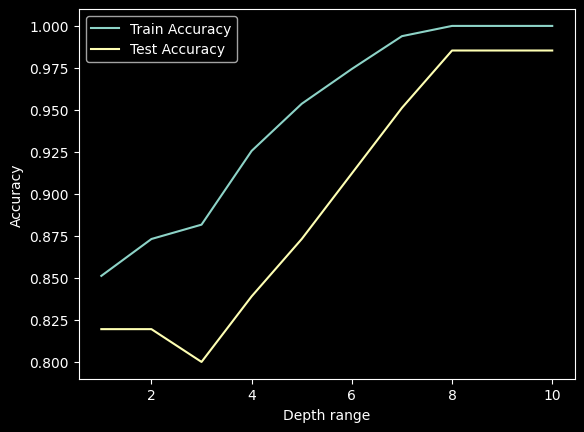

In [16]:
import matplotlib.pyplot as plt

train_accuracies = []
test_accuracies = []

depth_range = range(1,11)

for each_depth in depth_range:
    rf_model = RandomForestClassifier(max_depth=each_depth, random_state=42)
    rf_model.fit(X_train, y_train)
    train_accuracies.append(rf_model.score(X_train, y_train))
    test_accuracies.append(rf_model.score(X_test, y_test))
    
plt.plot(depth_range, train_accuracies, label="Train Accuracy")
plt.plot(depth_range, test_accuracies, label="Test Accuracy")
plt.xlabel("Depth range")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [17]:

print(f"Training Accuracy : {rf_model.score(X_train, y_train) * 100 : .2f} %")

print(f"Testing data accuracy : {accuracy_score(y_test , y_pred) * 100 : .2f} %")

Training Accuracy :  100.00 %
Testing data accuracy :  98.54 %


In [21]:
# Feature importances
rf_model.fit(X_train, y_train)
rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

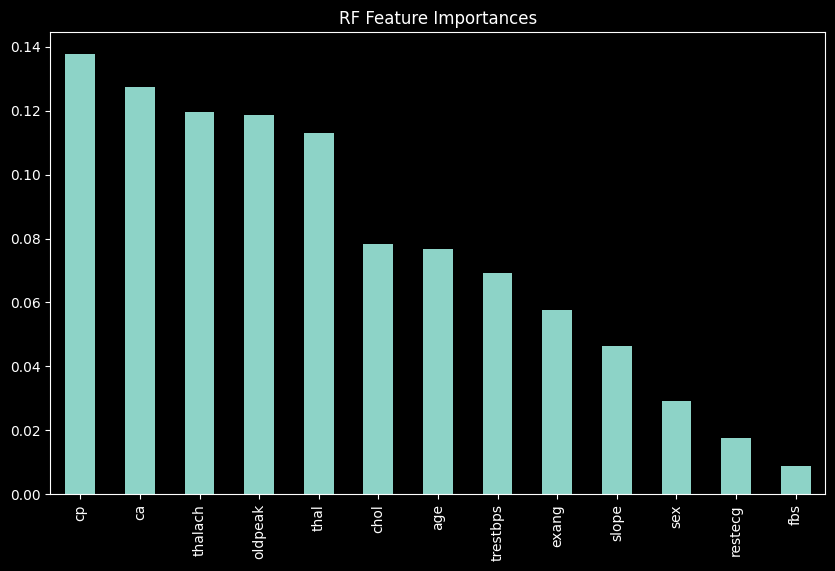

In [22]:
plt.figure(figsize=(10, 6))
rf_importances.sort_values(ascending=False).plot(kind='bar', title='RF Feature Importances')
plt.show()

Cross-validation score

In [24]:
from sklearn.model_selection import cross_val_score

rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print(f"RF Mean Accuracy: {rf_scores.mean():.3f}")

RF Mean Accuracy: 0.994
